In [1]:
	
import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

print(f"Columnas detectadas: {len(dataframe.columns)}")
dataframe.head(2)

Columnas detectadas: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Precisión del XGBoost: 0.7208

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



/tmp/ipykernel_1598/4054044294.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette="viridis")


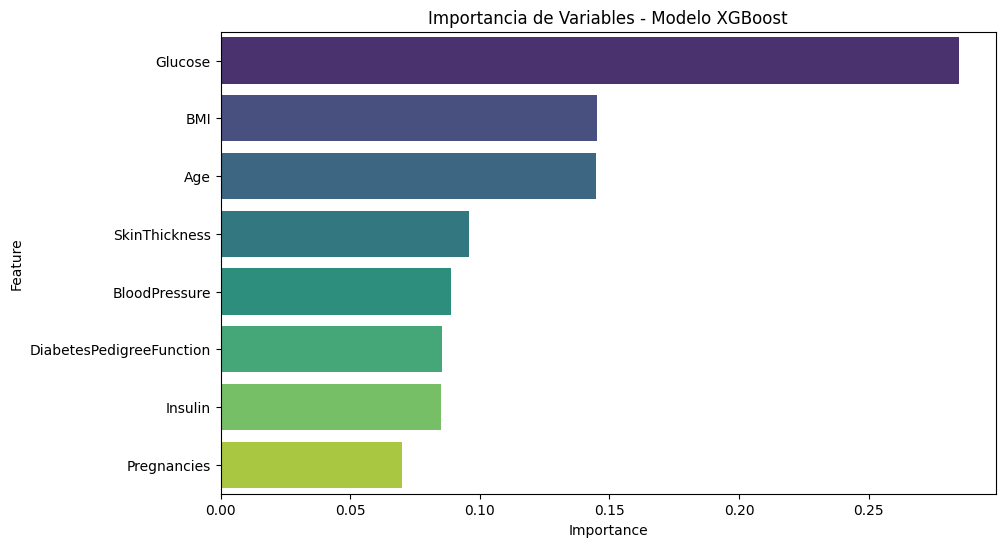

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = dataframe.drop("Outcome", axis=1) 
y = dataframe["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(f"Precisión del XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

importances_xgb = xgb_model.feature_importances_
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette="viridis")
plt.title("Importancia de Variables - Modelo XGBoost")
plt.show()